# Pymaceuticals Inc.
---

### Analysis

- Higher weight mice had larger tumors
- Capomulin looks to be the most effective drug among the mice
- The gender breakdown was evenly split between male/female mice
 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'], how='left')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [87]:
# Checking the number of mice.
total_mice = len(study_results['Mouse ID'].unique())
total_mice

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids = duplicate_mice['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_ids)]

In [91]:
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [92]:
clean_df = merged_df.drop_duplicates()
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [93]:
# Checking the number of mice in the clean DataFrame.
clean_df = merged_df.loc[merged_df['Mouse ID'] !='g989']
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame ({
     'Mean Tumor Volume': mean,
     'Median Tumor Volume': median,
     'Tumor Variance Volume': var,
     'Tumor Volume Std. Dev.': std,
     'Tumor Volume Std Err.': sem
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance Volume,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
oneline_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
oneline_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

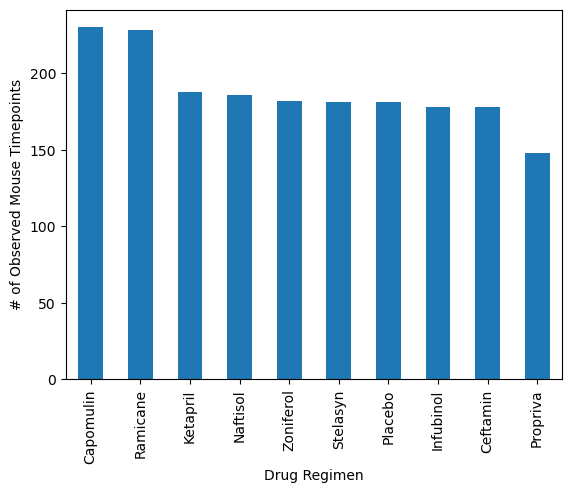

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', ylabel= '# of Observed Mouse Timepoints', xlabel ='Drug Regimen')
plt.show()

In [97]:
x_axis = regimen_counts.index
y_axis = regimen_counts.values

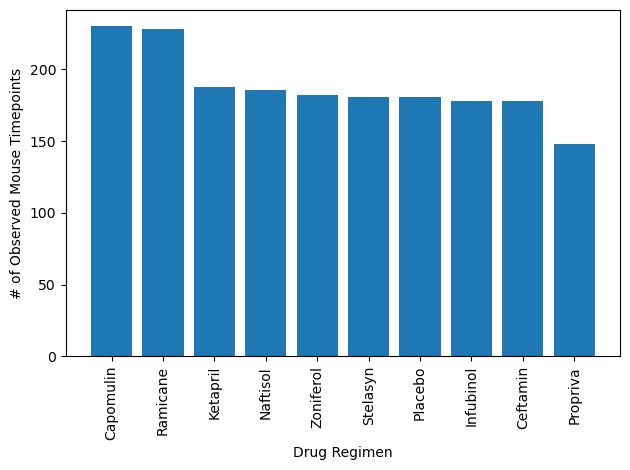

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Plotting the bar chart directly from the Series
x_axis = regimen_counts.index
y_axis = regimen_counts.values
plt.bar(x_axis,y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [99]:
male_female = clean_df['Sex'].value_counts()

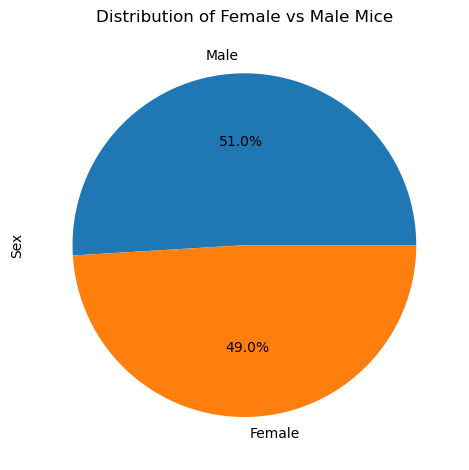

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.tight_layout()

In [101]:
gender_counts = clean_df['Sex'].value_counts()

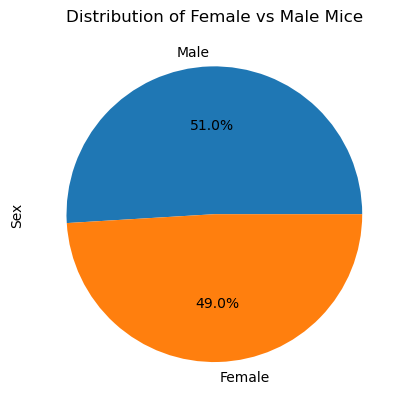

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
df_filtered = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]
last_timepoints = df_filtered.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, df_filtered, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

In [107]:
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [109]:
# Create empty list to fill with tumor vol data (for plotting)
outliers_list = []

# Loop through each treatment regimen
for treatment in treatments:
    # Filter data for the current treatment
    tumor_vol = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate quartiles, IQR, and potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    
    iqr = upper_quartile - lower_quartile
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers
    potential_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers:")
    print(potential_outliers)
    print()  # Add a new line for clarity

    # Store potential outliers in the list
    outliers_list.append({'Drug Regimen': treatment, 'Potential Outliers': potential_outliers})

# Print the outliers list or further process as needed
print(outliers_list)


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

[{'Drug Regimen': 'Capomulin', 'Potential Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}, {'Drug Regimen': 'Ramicane', 'Potential Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}, {'Drug Regimen': 'Infubinol', 'Potential Outliers': 15    36.321346
Name: Tumor Volume (mm3), dtype: float64}, {'Drug Regimen': 'Ceftamin', 'Potential Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}]


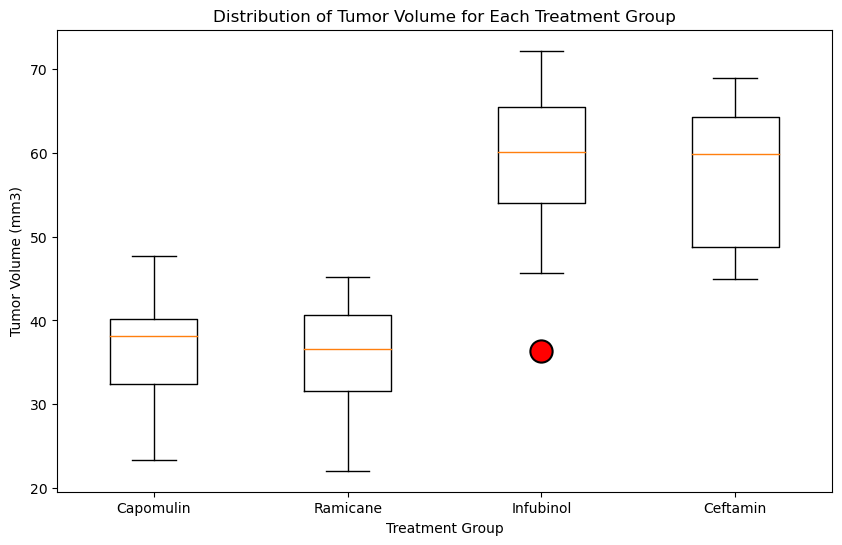

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor = 'red', markeredgecolor= 'black', markersize = 16, markeredgewidth = 1.5)
plt.figure(figsize=(10,6)) 
plt.boxplot([final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments], 
            labels=treatments,flierprops=flierprops)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

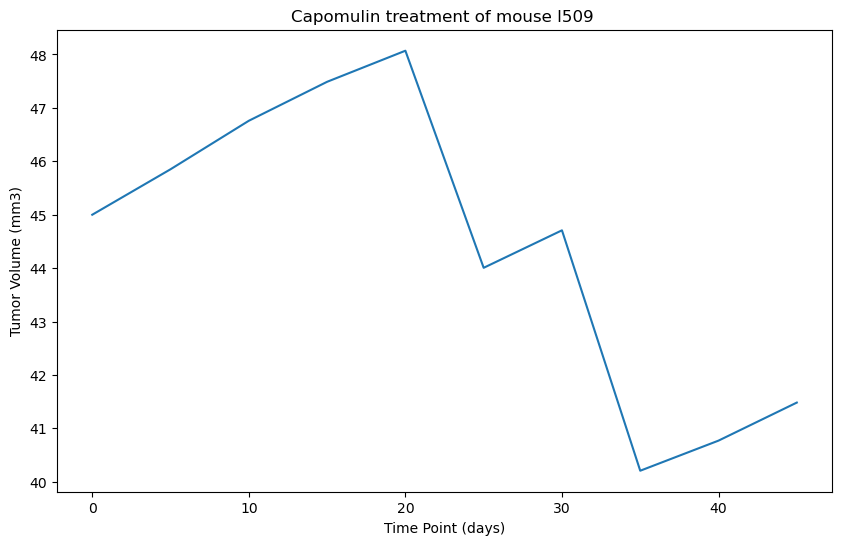

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse treated with Capomulin
mouse_id = 'l509'

capomulin = clean_df.loc[clean_df['Drug Regimen']== "Capomulin"]
mouse_data = capomulin.loc[capomulin['Mouse ID'] == mouse_id]
# Sorting the data by Timepoint
mouse_data_sorted = mouse_data.sort_values(by='Timepoint')
# Plotting tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data_sorted['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {mouse_id} ')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

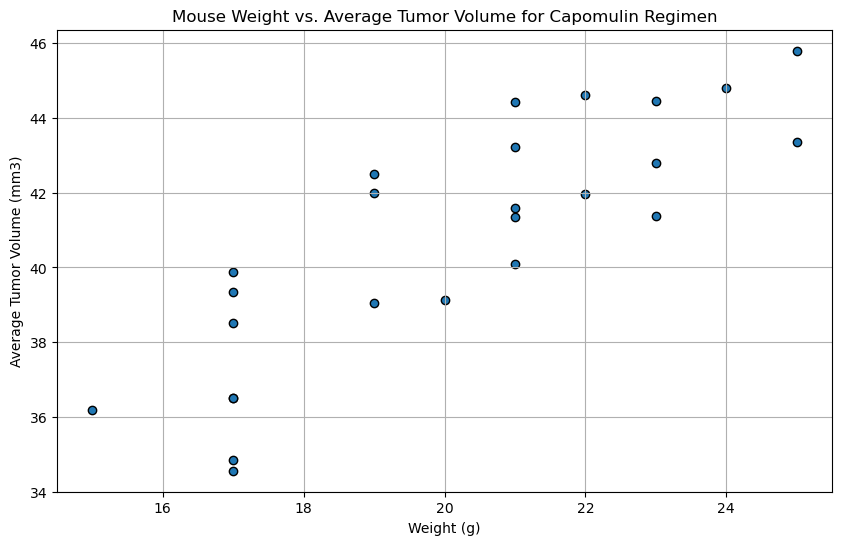

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for mice treated with Capomulin
capomulin = clean_df.loc[clean_df['Drug Regimen']== "Capomulin"]
# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Get the corresponding weights for each mouse
mouse_weights = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
# Plot scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(mouse_weights, average_tumor_volume, marker='o', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


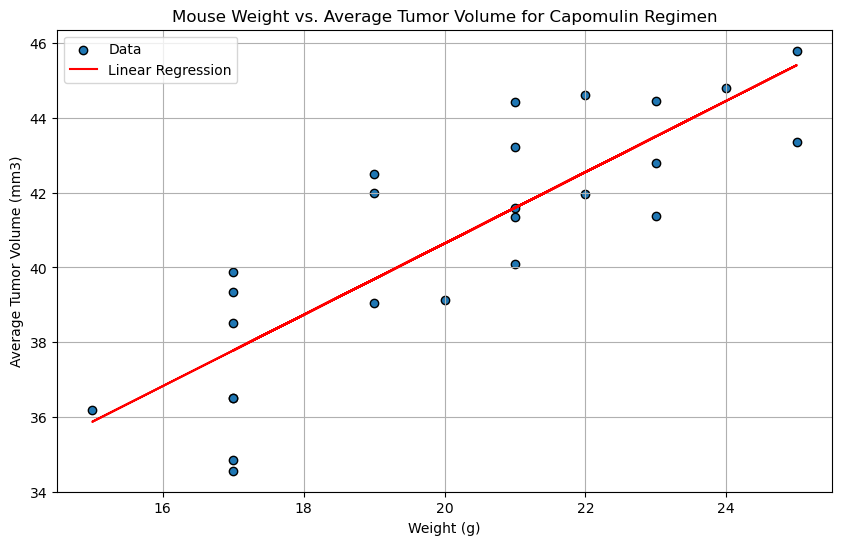

In [113]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weights, average_tumor_volume)[0]
print(f'The correlation between mouse weight and the average tumor volume is  {round(correlation, 2)}')
# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)
# Plot mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', edgecolors='black', label='Data')
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()